In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np
from inference.walker_inference import BiasedPersistentInferer, prepare_paths
from in_silico.sources import PointSource
import matplotlib.pyplot as plt


In [2]:
myd88high_filename = '/Users/danieltudor/Dropbox/MyD88/24hpi_5_24hpi exp1 myd88 high.csv'
myd88high_dataframe = pd.read_csv(myd88high_filename,header=1)
myd88low_filename = '/Users/danieltudor/Dropbox/MyD88/24hpi_5_24hpi exp1 myd88 low.csv'
myd88low_dataframe = pd.read_csv(myd88low_filename,header=1)
myd88both_filename = '/Users/danieltudor/Dropbox/MyD88/24hpi_5_24hpi exp1 myd88 combined.csv'
myd88both_dataframe = pd.read_csv(myd88both_filename,header=1)

In [3]:
# preview the structure of the data
len(myd88high_dataframe['TrackID'].unique())

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID
0,261.39,141.73,22.08,um,Surface,Position,1,1000003634,3634
1,238.40,134.64,22.01,um,Surface,Position,2,1000003634,5074
2,214.80,121.17,23.01,um,Surface,Position,3,1000003634,5103
3,204.16,110.37,21.98,um,Surface,Position,4,1000003634,5127
4,185.30,101.51,19.32,um,Surface,Position,5,1000003634,5153


In [11]:
len(myd88high_dataframe['TrackID'].unique()) + len(myd88low_dataframe['TrackID'].unique())

29

In [18]:
print(myd88high_dataframe['Position X'].min(),myd88high_dataframe['Position X'].max())
print(myd88high_dataframe['Position Y'].min(),myd88high_dataframe['Position Y'].max())

93.34 311.67
2.78 422.6


In [4]:
# extract the track IDs
myd88high_trackIDs = np.unique(myd88high_dataframe['TrackID'])
num_tracks = len(myd88high_trackIDs)
num_timepoints = len(np.unique(myd88high_dataframe['Time'].values))
num_tracks, num_timepoints

(17, 60)

In [5]:
myd88low_dataframe[:5]

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID
0,144.15,257.67,19.99,um,Surface,Position,1,1000000000,0
1,142.51,271.02,19.07,um,Surface,Position,2,1000000000,8
2,141.46,286.30,19.85,um,Surface,Position,3,1000000000,20
3,147.74,282.86,19.47,um,Surface,Position,4,1000000000,30
4,139.47,268.20,19.41,um,Surface,Position,5,1000000000,37


In [6]:
# extract the track IDs
myd88low_trackIDs = np.unique(myd88low_dataframe['TrackID'])
num_tracks = len(myd88low_trackIDs)
num_timepoints = len(np.unique(myd88low_dataframe['Time'].values))
num_tracks, num_timepoints

(12, 60)

In [7]:
myd88both_dataframe[:5]

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID
0,144.15,257.67,19.99,um,Surface,Position,1,1000000000,0
1,142.51,271.02,19.07,um,Surface,Position,2,1000000000,8
2,141.46,286.30,19.85,um,Surface,Position,3,1000000000,20
3,147.74,282.86,19.47,um,Surface,Position,4,1000000000,30
4,139.47,268.20,19.41,um,Surface,Position,5,1000000000,37


In [8]:
# extract the track IDs
myd88both_trackIDs = np.unique(myd88both_dataframe['TrackID'])
num_tracks = len(myd88both_trackIDs)
num_timepoints = len(np.unique(myd88both_dataframe['Time'].values))
num_tracks, num_timepoints

(29, 60)

In [9]:
myd88high = pd.DataFrame({'trackID':myd88high_dataframe['TrackID'],
                             'time':myd88high_dataframe['Time'],
                             'x':myd88high_dataframe['Position X'],
                             'y':myd88high_dataframe['Position Y'],
                             'z':myd88high_dataframe['Position Z']})

myd88low = pd.DataFrame({'trackID':myd88low_dataframe['TrackID'],
                             'time':myd88low_dataframe['Time'],
                             'x':myd88low_dataframe['Position X'],
                             'y':myd88low_dataframe['Position Y'],
                             'z':myd88low_dataframe['Position Z']})

myd88both = pd.DataFrame({'trackID':myd88both_dataframe['TrackID'],
                             'time':myd88both_dataframe['Time'],
                             'x':myd88both_dataframe['Position X'],
                             'y':myd88both_dataframe['Position Y'],
                             'z':myd88both_dataframe['Position Z']})

In [11]:
myd88high_inferer = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in myd88high.groupby('trackID')], include_t=False), PointSource((300, 300)))
niter = 2000 # number of MCMC iterations
nwalkers = 500 # number of 
myd88high_inf = myd88high_inferer.ensembleinfer(nwalkers,niter)

  0%|          | 0/2000 [00:00<?, ?it/s]

Running sampler: 


100%|██████████| 2000/2000 [03:47<00:00,  8.78it/s]


In [12]:
myd88low_inferer = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in myd88low.groupby('trackID')], include_t=False), PointSource((300, 300)))
niter = 2000 # number of MCMC iterations
nwalkers = 500 # number of 
myd88low_inf = myd88low_inferer.ensembleinfer(nwalkers,niter)

  0%|          | 0/2000 [00:00<?, ?it/s]

Running sampler: 


  1%|          | 23/2000 [00:02<04:13,  7.79it/s]/Users/danieltudor/Documents/Wood group/ImmuneCellMigrationAnalysis/inference/walker_inference.py:226: RuntimeWarning: divide by zero encountered in log
  log_p_0 = np.log(p_0)
100%|██████████| 2000/2000 [04:04<00:00,  8.17it/s]


In [13]:
myd88high_sampler = myd88high_inf[0]
myd88high_p = myd88high_sampler.get_chain(discard=250, thin=10, flat=True)
High =  myd88high_p[:,1]

myd88low_sampler = myd88low_inf[0]
myd88low_p = myd88low_sampler.get_chain(discard=250, thin=10, flat=True)
Low =  myd88low_p[:,1]

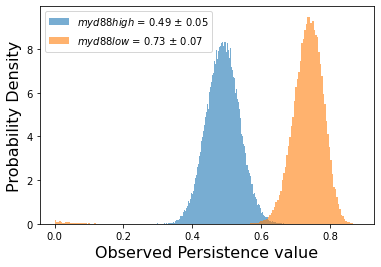

In [15]:
myd88high_sampler = myd88high_inf[0]
myd88high_p = myd88high_sampler.get_chain(discard=250, thin=10, flat=True)
High = myd88high_p[:,0]

myd88low_sampler = myd88low_inf[0]
myd88low_p = myd88low_sampler.get_chain(discard=250, thin=10, flat=True)
Low =  myd88low_p[:,0]


plt.hist(High,label='$myd88high$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(High), np.std(High)),bins=200,alpha=0.6,density=True)
plt.hist(Low,label='$myd88low$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(Low), np.std(Low)),bins=200,alpha=0.6,density=True)
#plt.title("Both inferred persistence parameter")
plt.xlabel("Observed Persistence value",fontsize=16)
plt.ylabel("Probability Density",fontsize=16)
plt.legend()
#plt.savefig("/Users/danieltudor/Dropbox/MyD88/Images/MyD88 Observed Persistence.pdf")



In [23]:
from inference.walker_inference_mixed_persistence import BiasedPersistentInferer
myd88both_inferer = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in myd88both.groupby('trackID')], include_t=False), PointSource((300, 300)))
niter = 2500 # number of MCMC iterations
nwalkers = 120 # number of 
myd88both_total = myd88both_inferer.Ensembleinfer(nwalkers,niter)

  0%|          | 0/2500 [00:00<?, ?it/s]

Running sampler: 


100%|██████████| 2500/2500 [02:14<00:00, 18.62it/s]


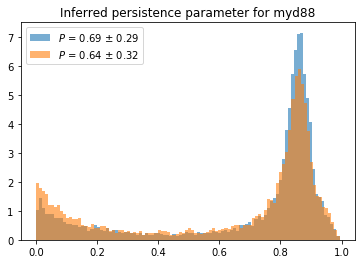

In [26]:
sampler = myd88both_total[0]
p_total = sampler.get_chain(discard=1000, thin=15, flat=True)
W1 = p_total[:,0]
P1 = p_total[:,2]
P2 = p_total[:,3]
OP1 = (1-W1)*P1
OP2 = (1-W1)*P2
plt.hist(P1,label='$P$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(P1), np.std(P1)),bins=100,alpha=0.6,density=True)
plt.hist(P2,label='$P$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(P2), np.std(P2)),bins=100,alpha=0.6,density=True)

plt.title("Inferred persistence parameter for myd88")
plt.legend()
#plt.savefig("/Users/danieltudor/Documents/Neutrophil_PNCs/my_d88_Persistence_total_mix_w2_p1_p2.pdf")



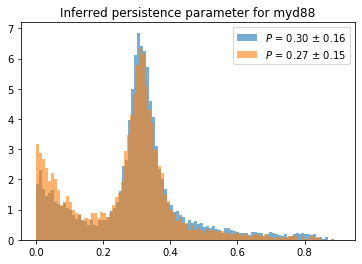

In [27]:
plt.hist(OP1,label='$P$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(OP1), np.std(OP1)),bins=100,alpha=0.6,density=True)
plt.hist(OP2,label='$P$ = {:.2f} $\pm$ {:.2f}'.format(np.mean(OP2), np.std(OP2)),bins=100,alpha=0.6,density=True)

plt.title("Inferred persistence parameter for myd88")
plt.legend()

Text(0.5, 1.0, 'Persistence emcee chain')

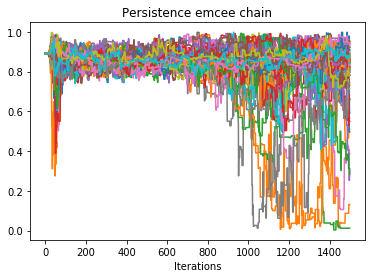

In [14]:
p_samples = sampler.get_chain(discard=0, thin=1, flat=False)
P1 = p_samples[:,:,2]


P2 = p_samples[:,:,3]
#plt.plot(P1)
plt.plot(P1)
#plt.text(25000, 0.95, 'Number of ensemble walkers = 100, Iteratons = 2000', style='italic',
#        bbox={'facecolor': 'blue', 'alpha': 0.1, 'pad': 10})
#plt.axhspan(0,1,0.15,0.05,facecolor = "black",alpha=0.2)
#plt.annotate('burn-in', xy=(24000, 0.8), xytext=(35000, 0.6),
 #           arrowprops=dict(facecolor='black', shrink=0.01))
plt.xlabel("Iterations")
plt.title("Persistence emcee chain")

In [16]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(7440, 5)


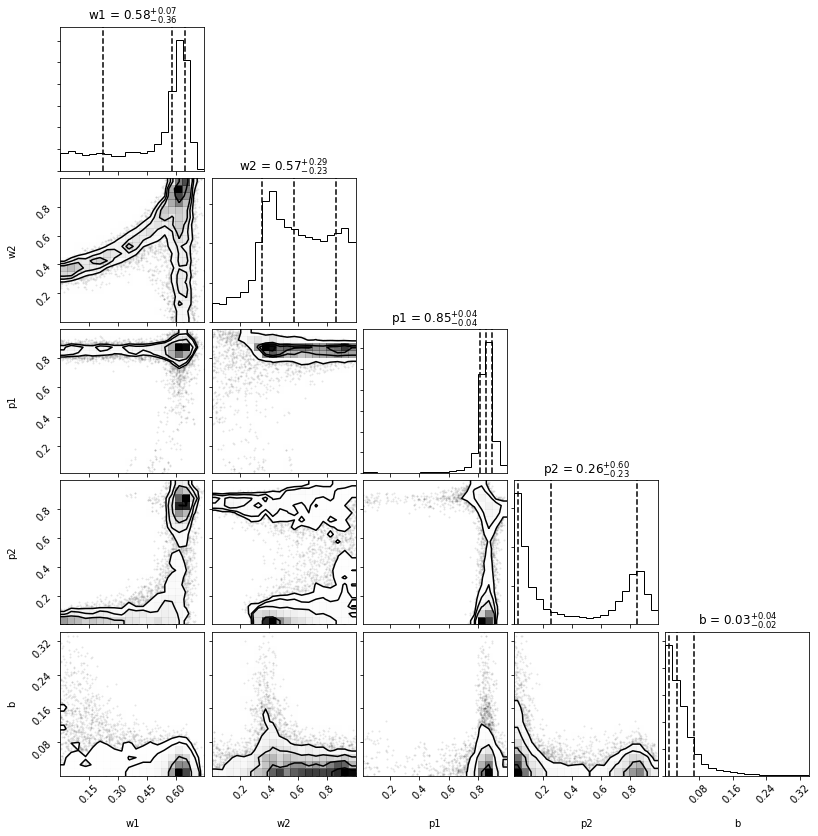

In [17]:
import corner

labels = ["w1", "w2","p1","p2", "b"]
fig = corner.corner(
    flat_samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
    show_titles=True, title_kwargs={"fontsize": 12})

#plt.savefig("/Users/danieltudor/Documents/Neutrophil_PNCs/myd88_Parameters_corner.pdf")


